In [47]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

## prepare data

## Titanic data set

In [48]:
df = pd.read_csv('Titanic.csv')
# one hot encoding 
df = pd.get_dummies(df,columns=["Pclass","Sex","SibSp","Parch","Embarked"])
# min max scaling
scaler = MinMaxScaler()
df[["Age","Fare"]] = scaler.fit_transform(df[["Age","Fare"]])
df.head()

,Age,Fare,survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0.472229,0.139136,1,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,0.321438,0.015469,1,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,0.434531,0.103644,1,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0.434531,0.015713,0,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         891 non-null    float64
 1   Fare        891 non-null    float64
 2   survived    891 non-null    int64  
 3   Pclass_1    891 non-null    uint8  
 4   Pclass_2    891 non-null    uint8  
 5   Pclass_3    891 non-null    uint8  
 6   Sex_female  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
 8   SibSp_0     891 non-null    uint8  
 9   SibSp_1     891 non-null    uint8  
 10  SibSp_2     891 non-null    uint8  
 11  SibSp_3     891 non-null    uint8  
 12  SibSp_4     891 non-null    uint8  
 13  SibSp_5     891 non-null    uint8  
 14  SibSp_8     891 non-null    uint8  
 15  Parch_0     891 non-null    uint8  
 16  Parch_1     891 non-null    uint8  
 17  Parch_2     891 non-null    uint8  
 18  Parch_3     891 non-null    uint8  
 19  Parch_4     891 non-null    u

In [50]:
df.describe()

,Age,Fare,survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.363679,0.062858,0.383838,0.242424,0.206510,0.551066,0.352413,0.647587,0.682379,0.234568,...,0.760943,0.132435,0.089787,0.005612,0.004489,0.005612,0.001122,0.188552,0.086420,0.725028
std,0.163605,0.096995,0.486592,0.428790,0.405028,0.497665,0.477990,0.477990,0.465813,0.423966,...,0.426747,0.339154,0.286037,0.074743,0.066890,0.074743,0.033501,0.391372,0.281141,0.446751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.271174,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.346569,0.028213,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.434531,0.060508,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Train Test split

In [51]:
x = df.drop("survived",axis = 1).values
y = df[["survived"]].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)


## helper functions

In [52]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) )
def mean_squared_error(predictions,labels):
    mse = ((predictions - labels)**2).sum()/(2*N)
    return mse
def accuracy(predictions,labels):
    correct_predictions = predictions.round() == labels
    accuracy = correct_predictions.mean()
    return accuracy

### parameters

In [53]:
learning_rate = 0.1
epochs = 10000
N = y_train.size

n_input = 24
n_hidden = 4
n_output = 1

In [54]:
np.random.seed(3)

weights_1 = np.random.normal(scale = 0.5 , size = (n_input,n_hidden)) #(4,2)
weights_2 = np.random.normal(scale = 0.5 , size = (n_hidden,n_output)) #(2,3)

monitoring = {'mean_squared_error':[],'Accuracy':[]}

In [55]:
for epoch in range(epochs):
    
    # feedforward
    hidden_layer = sigmoid(np.dot(x_train,weights_1)) #(712,24) (24,4)  ==> (712,4)
    output_layer = sigmoid(np.dot(hidden_layer,weights_2)) #(712,4) (4,1) ==> (712,1)
    
    ## mean squared error
    mse = mean_squared_error(output_layer,y_train)
    accuracy_value = accuracy(output_layer,y_train)
    
    monitoring['mean_squared_error'].append(mse)
    monitoring['Accuracy'].append(accuracy_value)
    
    
    # backpropagation
    output_delta = (output_layer - y_train) * output_layer * (1 - output_layer) #(712,1) final output mat size
    hidden_delta = np.dot(output_delta,weights_2.T) * hidden_layer * (1 - hidden_layer) # (712,4)
    
    # weights updates
    weights_2 = weights_2 - learning_rate * np.dot(hidden_layer.T,output_delta) / N
    weights_1 = weights_1 - learning_rate * np.dot(x_train.T,hidden_delta) / N

In [56]:
monitoring_df = pd.DataFrame(monitoring)
monitoring_df

,mean_squared_error,Accuracy
0,0.132219,0.403090
1,0.132073,0.403090
2,0.131927,0.400281
3,0.131783,0.403090
4,0.131640,0.403090
...,...,...
9995,0.069593,0.814607
9996,0.069592,0.814607
9997,0.069592,0.814607
9998,0.069592,0.814607


<AxesSubplot:title={'center':'Accuracy'}>

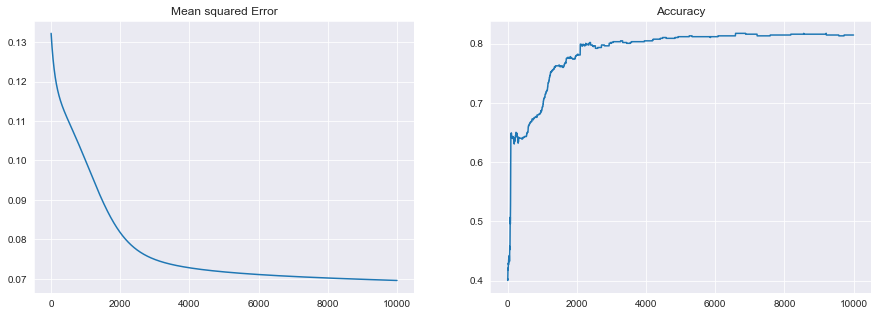

In [60]:
fig ,ax = plt.subplots(1,2,figsize=(15,5))

monitoring_df.mean_squared_error.plot(ax = ax[0],title="Mean squared Error")
monitoring_df.Accuracy.plot(ax = ax[1],title = "Accuracy")
### The error has gradually decreased and increase in the accuracy.

## Test data

In [58]:
## feed forward
hidden_layer = sigmoid(np.dot(x_test,weights_1))
output_layer = sigmoid(np.dot(hidden_layer,weights_2))

In [59]:
acc = accuracy(output_layer,y_test)
print(f'Accuracy :{acc}')

Accuracy :0.8156424581005587
